# Lumber Prices

* **Data:** `lumber-prices.csv`
* **Description:** Chicago lumber futures per 1000 board feet, in USD, as of some time in 2021. To keep things simple, we're going to say that this is the measurement over a month instead of just one date per month. Basically: each month, how much you'd pay if you bought 125 2x4 boards at the hardware store.
* **Source:** https://tradingeconomics.com/commodity/lumber
* **Columns of interest:**
    * `Open` is the price at the start of the month
    * `High` is the high price over the course of the month
    * `Low` is the low number over the course of the month
    * `Close` is the number at the end of the month

## Read in your data

In [2]:
import pandas as pd
df = pd.read_csv("lumber-prices.csv")

## What is the earliest month in this dataset?

We only have one reading per month, so you could also read this as "what is the earliest date in the dataset"

In [3]:
df.date.min()
# It looks like the earliers month is December 1996

'1996-12-09T00:00:00'

## What is the most recent month in this dataset?

We only have one reading per month, so you could also read this as "what is the earliest date in the dataset"

In [4]:
df.date.max()

'2021-11-01T00:00:00'

In [5]:
# It looks like the most recent month is November 2021. 

## What 3 months had the highest high lumber price?

In [6]:
# To be able to sort the high column I remove the $ in front of every number and convert the variable into an integer
df['high'] = df['high'].str.replace('$', '')
df['high'] = df['high'].astype(float)

/var/folders/hx/m3n3wwr91yg_snnv68ynqsp80000gn/T/ipykernel_8860/3188468630.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['high'] = df['high'].str.replace('$', '')


In [7]:
# And then I sort the column and print the three highest prices. It looks like May, April and June of 2021 had
# the highest lumber prices.
df.sort_values('high', ascending=False).head(3)

,open,high,low,close,date
293,$1520.60,1711.2,$1201.00,$1309.50,2021-05-03T00:00:00
292,$1012.60,1502.3,$1006.00,$1500.50,2021-04-01T00:00:00
294,$1315.00,1380.0,$705.00,$716.00,2021-06-01T00:00:00


## What 3 months had the lowest low lumber price?

In [8]:
df['low'] = df['low'].str.replace('$', '')
df['low'] = df['low'].astype(float)

/var/folders/hx/m3n3wwr91yg_snnv68ynqsp80000gn/T/ipykernel_8860/925776444.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['low'] = df['low'].str.replace('$', '')


In [9]:
# And then I sort the column and print the three highest prices. It looks like the 
df.sort_values('low', ascending=False).tail(3)
# The lowest lumber prices where in January, February and March of 2009. The financial crisis really hit the 
# lumber industry hard huh?

,open,high,low,close,date
147,$144.60,179.8,138.0,$171.30,2009-03-02T00:00:00
146,$158.10,175.9,138.0,$147.00,2009-02-02T00:00:00
145,$168.70,171.8,137.9,$148.10,2009-01-02T00:00:00


In [10]:
# However, it looks like I get the same answer if I take the three lowest values in the high column. But I wouldn't
# have known that, if I hadn't done it the other way too. 
df.sort_values('high', ascending=False).tail(3)

,open,high,low,close,date
147,$144.60,179.8,138.0,$171.30,2009-03-02T00:00:00
146,$158.10,175.9,138.0,$147.00,2009-02-02T00:00:00
145,$168.70,171.8,137.9,$148.10,2009-01-02T00:00:00


## What is the median "high" lumber price in our dataset?

In [11]:
df.high.median()
# The median "high" lumber price is 329.65 dollars

329.65

## What is the median "low" lumber price in our dataset?

In [12]:
df.low.median()
# And the median "low" lumber price is 286.1 dollars

286.1

## Plot the maximum "high" lumber price on an annual basis.

In [16]:
# First I change the date column into datetime format
df['date'] = pd.to_datetime(df.date)

<AxesSubplot: xlabel='date'>

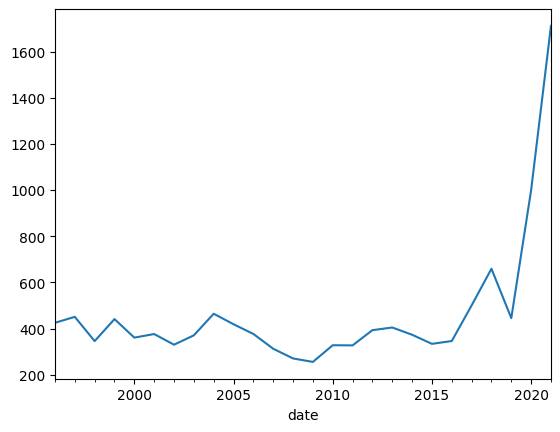

In [18]:
df.resample('Y', on='date').high.max().plot()

## Plot the lowest "low" lumber price on an annual basis.

<AxesSubplot: xlabel='date'>

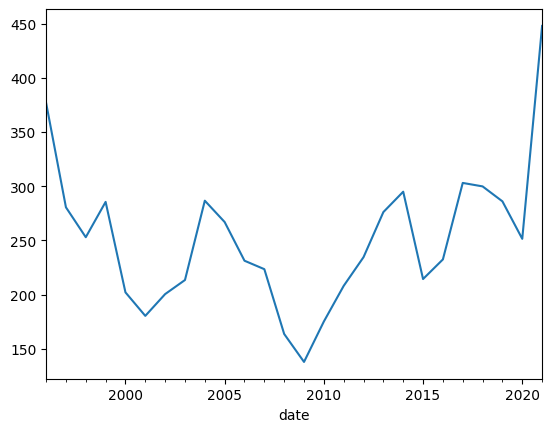

In [19]:
df.resample('Y', on='date').low.min().plot()

In [57]:
## Plot the median "close" lumber price on an quarterly basis.

In [21]:
# Again I have to remove the $ and convert the column into a float

df['close'] = df['close'].str.replace('$', '')
df['close'] = df['close'].astype(float)

/var/folders/hx/m3n3wwr91yg_snnv68ynqsp80000gn/T/ipykernel_8860/3378432947.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['close'] = df['close'].str.replace('$', '')


<AxesSubplot: xlabel='date'>

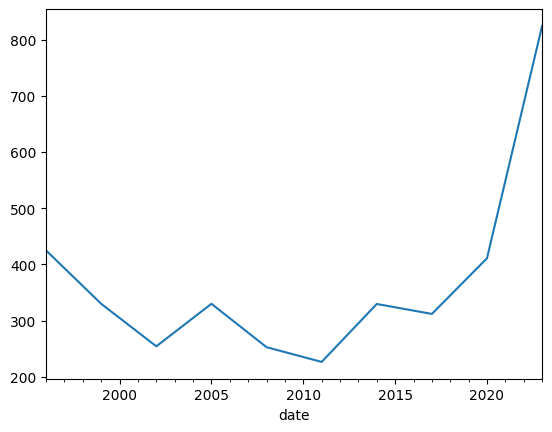

In [22]:
df.resample('3Y', on='date').close.median().plot()

## What month in our dataset had the largest swing between high and low?

You'll want to create a new column for this one

In [23]:
df['swing'] = df['high'] - df['low']

In [27]:
df.sort_values('swing', ascending=False).head(1)

# It looks like June 2021 had the largest swing between high and low prices. 

,open,high,low,close,date,swing
294,$1315.00,1380.0,705.0,716.0,2021-06-01,675.0


## In how many months did lumber prices rise?

If the price was greater at the end of the month than the beginning of the month, we'll say the price rose.

In [30]:
df['open'] = df['open'].str.replace('$', '')
df['open'] = df['open'].astype(float)

/var/folders/hx/m3n3wwr91yg_snnv68ynqsp80000gn/T/ipykernel_8860/1251319450.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['open'] = df['open'].str.replace('$', '')


In [31]:
df['price_rise'] = df['close'] > df['open']

In [38]:
df.price_rise.value_counts()

# Here 'True' means that the prices rose. In 145 out of 300 months, the lumber prices rose. 

False    155
True     145
Name: price_rise, dtype: int64

## How many months did lumber prices drop?

If the price was lower at the end of the month than the beginning of the month, we'll say the price dropped.

In [39]:
df['price_drop'] = df['close'] < df['open']

In [40]:
df.price_drop.value_counts()
# Here 'True' means that the prices dropped. In 155 out of 300 months, the lumber prices rose. 
# However, I could just have used the results from the previous question instead of creating a new column and everything.
# There the result would just have been the number of 'False'.

True     155
False    145
Name: price_drop, dtype: int64

## In 2020, how many months saw lumber prices rise vs lumber prices fall?

In [61]:
df[df.date.dt.year == 2020].price_rise.value_counts()
# In 2020 the prices rose in 8 out of 12 months while the prices dropped
# in last 4 months

True     8
False    4
Name: price_rise, dtype: int64

## In 2000, how many months saw lumber prices rise vs lumber prices fall?

In [62]:
df[df.date.dt.year == 2000].price_rise.value_counts()
# In 2000 the prices rose in 2 out of 12 months while the prices dropped
# in last 10 months

False    10
True      2
Name: price_rise, dtype: int64